### Markov chains code

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy

### Base model, ran for comparison

In [2]:
#function to see whether a new solution is accepted or rejected
def metropolis(f_x, f_x_star, t, minimisation=False):
    delta = (-1 if minimisation else 1)*(f_x_star - f_x)
    if delta > 0:
        return True
    return np.random.random() < np.exp(delta/t)

#function to alter a solution given
def peturb_TSP(sol):
    idxs = range(len(sol))
    first, second = np.random.choice(idxs, 2, replace=False)
    new_sol = sol.copy()
    new_sol[first], new_sol[second] = new_sol[second], new_sol[first]
    return new_sol

In [3]:
#calculates cost of a solution
def quality_TSP_Gen(M):
    def quality_TSP(sol):
        cost = 0
        for i in range(len(sol)):
            cost += M[sol[i-1], sol[i]]
        return cost
    return quality_TSP

#performs simmulated annealing iterations
def SA(f, peturb, sol, per_temp, t0, alpha, minimisation=False, tol=1e-3, verbose=False):
    T = t0
    if verbose: print("initial guess: {0}, quality: {1}".format(sol, f(sol)))
    while T > tol:
        for _ in range(per_temp):
            sol_new = peturb(sol)
            if metropolis(f(sol), f(sol_new), T, minimisation=minimisation):
                sol = sol_new.copy()
        if verbose: print("Best Guess at T={0}: {1}, quality: {2}".format(T, sol, f(sol)))
        T = alpha*T
    if verbose: print("Best Guess: {0}, quality: {1}".format(sol, f(sol)))
    return sol, f(sol)


In [4]:
#declaring the distances between the cities
T = np.array([[0, 10, 15, 20],
            [10, 0, 35, 25],
            [15, 35, 0, 30],
            [20, 25, 30, 0]])

sol_0 = [0, 1, 2, 3]  # Starting state
f = quality_TSP_Gen(T) 
per_temp = 10
t0 = 1
tol=1e-2
verbose=True
alpha=0.8

In [6]:
#base model optimal tour
path, quality = SA(f=f, peturb=peturb_TSP, sol=sol_0, per_temp=per_temp, 
                   t0=t0, alpha=alpha, tol=tol, minimisation=True,
                   verbose=True)

print(path, quality)

initial guess: [0, 1, 2, 3], quality: 95
Best Guess at T=1: [3, 1, 0, 2], quality: 80
Best Guess at T=0.8: [0, 2, 3, 1], quality: 80
Best Guess at T=0.6400000000000001: [0, 2, 3, 1], quality: 80
Best Guess at T=0.5120000000000001: [0, 1, 3, 2], quality: 80
Best Guess at T=0.40960000000000013: [0, 2, 3, 1], quality: 80
Best Guess at T=0.32768000000000014: [0, 2, 3, 1], quality: 80
Best Guess at T=0.2621440000000001: [3, 2, 0, 1], quality: 80
Best Guess at T=0.2097152000000001: [3, 1, 0, 2], quality: 80
Best Guess at T=0.1677721600000001: [3, 1, 0, 2], quality: 80
Best Guess at T=0.13421772800000006: [3, 2, 0, 1], quality: 80
Best Guess at T=0.10737418240000006: [3, 1, 0, 2], quality: 80
Best Guess at T=0.08589934592000005: [3, 1, 0, 2], quality: 80
Best Guess at T=0.06871947673600004: [3, 1, 0, 2], quality: 80
Best Guess at T=0.054975581388800036: [3, 2, 0, 1], quality: 80
Best Guess at T=0.043980465111040035: [0, 2, 3, 1], quality: 80
Best Guess at T=0.03518437208883203: [3, 1, 0, 2], 

### Model ran with weather states (absorption transition matrix)

In [7]:
#calculates cost of a solution with weather state multipliers applied
def cal_distance(M):
    def calculate(sol, state, multipliers):
        dist = 0
        for i in range(len(sol)):
            dist += M[sol[i-1], sol[i]] * multipliers[state][i]
        return dist
    return calculate

#performs simmulated annealing iterations with weather states implemented
def SA_weather(f, peturb, sol, per_temp, t0, alpha, transition_matrix, state, multipliers, minimisation=False, tol=1e-3, verbose=True):
    states = []
    states_trials = 0
    T = t0
    while T > tol:
        for _ in range(per_temp):
            sol_new = peturb(sol)
            if metropolis(f(sol, state, multipliers), f(sol_new, state, multipliers), T, minimisation=minimisation):
                sol = sol_new.copy()
            states.append(state)
            states_trials += 1
            state = np.random.choice([0,1,2], p =transition_matrix[state])
        if verbose: print("Best Guess at T={0}: {1}, quality: {2}".format(T, sol, f(sol, state, multipliers)))
        T = alpha*T
    if verbose: print("Best Guess: {0}, quality: {1}".format(sol, f(sol, state, multipliers)))    
    return sol, f(sol, state, multipliers), states, states_trials


In [18]:
#declaring absorbtion transition matrix
transition_matrix = np.array([[1, 0, 0],
                              [0.15, 0.5, 0.35],
                              [0.15, 0.35, 0.5]])

#declaring weather multiplyiers
weather_mult = np.array([[1, 1, 1, 1],
                          [1, 1.5, 1.5, 1],
                          [2, 2, 1, 2]])

Best Guess at T=1: [2, 0, 1, 3], quality: 80.0
Best Guess at T=0.8: [1, 0, 2, 3], quality: 80.0
Best Guess at T=0.6400000000000001: [1, 3, 2, 0], quality: 80.0
Best Guess at T=0.5120000000000001: [1, 3, 2, 0], quality: 80.0
Best Guess at T=0.40960000000000013: [2, 3, 1, 0], quality: 80.0
Best Guess at T=0.32768000000000014: [2, 3, 1, 0], quality: 80.0
Best Guess at T=0.2621440000000001: [1, 3, 2, 0], quality: 80.0
Best Guess at T=0.2097152000000001: [1, 3, 2, 0], quality: 80.0
Best Guess at T=0.1677721600000001: [1, 3, 2, 0], quality: 80.0
Best Guess at T=0.13421772800000006: [2, 0, 1, 3], quality: 80.0
Best Guess at T=0.10737418240000006: [1, 0, 2, 3], quality: 80.0
Best Guess at T=0.08589934592000005: [2, 0, 1, 3], quality: 80.0
Best Guess at T=0.06871947673600004: [1, 0, 2, 3], quality: 80.0
Best Guess at T=0.054975581388800036: [1, 3, 2, 0], quality: 80.0
Best Guess at T=0.043980465111040035: [1, 0, 2, 3], quality: 80.0
Best Guess at T=0.03518437208883203: [1, 3, 2, 0], quality: 80

Text(0, 0.5, 'Weather state')

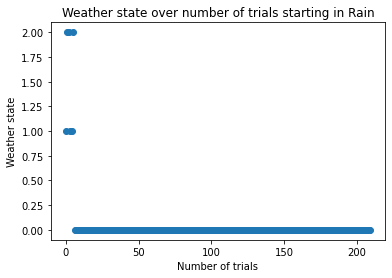

In [25]:
f = cal_distance(T) #using the function that takes into account weather states
sol_0 = [0, 1, 2, 3]  # Starting state

path, quality, states, states_trials = SA_weather(f=f, peturb=peturb_TSP, sol=sol_0, per_temp=per_temp, 
                   t0=t0, alpha=alpha, transition_matrix=transition_matrix, state= 1, multipliers=weather_mult, tol=tol, minimisation=True)

print(path)
print(quality)
plt.scatter([i for i in range(states_trials)], states) #plotting the weather states visited during the simmulated annealing process
plt.title("Weather state over number of trials starting in Rain")
plt.xlabel("Number of trials")
plt.ylabel("Weather state")

Best Guess at T=1: [0, 1, 3, 2], quality: 125.0
Best Guess at T=0.8: [3, 1, 0, 2], quality: 80.0
Best Guess at T=0.6400000000000001: [3, 2, 0, 1], quality: 80.0
Best Guess at T=0.5120000000000001: [0, 1, 3, 2], quality: 80.0
Best Guess at T=0.40960000000000013: [0, 1, 3, 2], quality: 80.0
Best Guess at T=0.32768000000000014: [0, 1, 3, 2], quality: 80.0
Best Guess at T=0.2621440000000001: [0, 1, 3, 2], quality: 80.0
Best Guess at T=0.2097152000000001: [0, 2, 3, 1], quality: 80.0
Best Guess at T=0.1677721600000001: [3, 1, 0, 2], quality: 80.0
Best Guess at T=0.13421772800000006: [0, 2, 3, 1], quality: 80.0
Best Guess at T=0.10737418240000006: [0, 1, 3, 2], quality: 80.0
Best Guess at T=0.08589934592000005: [0, 1, 3, 2], quality: 80.0
Best Guess at T=0.06871947673600004: [3, 2, 0, 1], quality: 80.0
Best Guess at T=0.054975581388800036: [3, 2, 0, 1], quality: 80.0
Best Guess at T=0.043980465111040035: [0, 1, 3, 2], quality: 80.0
Best Guess at T=0.03518437208883203: [0, 2, 3, 1], quality: 8

Text(0, 0.5, 'Weather state')

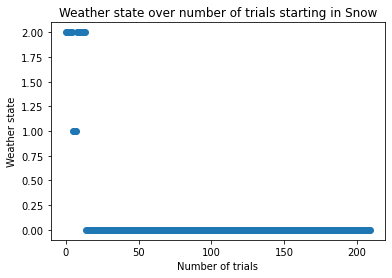

In [16]:
sol_0 = [0, 1, 2, 3]  # Starting state
f = cal_distance(T) #using the function that takes into account weather states

path, quality, states, states_trials = SA_weather(f=f, peturb=peturb_TSP, sol=sol_0, per_temp=per_temp, 
                   t0=t0, alpha=alpha, transition_matrix=transition_matrix, state= 2, multipliers=weather_mult, tol=tol, minimisation=True)

print(path)
print(quality)
plt.scatter([i for i in range(states_trials)], states) #plotting the weather states visited during the simmulated annealing process
plt.title("Weather state over number of trials starting in Snow")
plt.xlabel("Number of trials")
plt.ylabel("Weather state")

### Finding absorption time and absorption probability

In [17]:
#defining transition matrix in canonical form
absorb_matrix = np.array([[0.5, 0.35, 0.15],
                            [0.35, 0.5, 0.15],
                            [0, 0, 1]])
#find Q
Q1 = absorb_matrix[0:2, 0:2]
#find R
R1 = absorb_matrix[0:2, 2:]

#Calculate fundamental matrix N = (I - Q)^(-1)
N1 = np.linalg.inv((np.eye(2) - Q1))

#Calculate absorption times
t1 = N1.dot(np.array([1,1]))
print(t1)

#Calculate the absorption probability
B1 = N1.dot(R1)
print(B1)

[6.66666667 6.66666667]
[[1.]
 [1.]]


### Model ran with weather states (ergodic transition matrix)

Text(0, 0.5, 'Weather state')

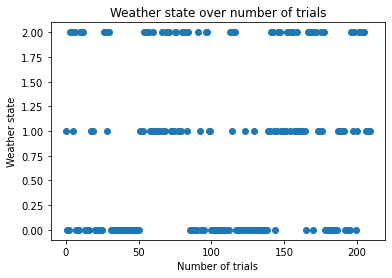

In [27]:
#defining ergodic matrix
ergodic_matrix = np.array([[0.90, 0.05, 0.05],
                            [0.15, 0.5, 0.35],
                            [0.15, 0.35, 0.5]])

# Define the initial state (city order)
sol_0 = [0, 1, 2, 3]  # Starting state
f = cal_distance(T) #using the function that takes into account weather states

path, quality, states, states_trials = SA_weather(f=f, peturb=peturb_TSP, sol=sol_0, per_temp=per_temp, 
                   t0=t0, alpha=alpha, transition_matrix=ergodic_matrix, state= 1, multipliers=weather_mult, tol=tol, minimisation=True, verbose=False)
plt.scatter([i for i in range(states_trials)], states) #plotting the weather states visited during the simmulated annealing process
plt.title("Weather state over number of trials")
plt.xlabel("Number of trials")
plt.ylabel("Weather state")

[80.0, 135.0, 130.0, 97.5, 80.0, 130.0, 80.0, 97.5, 107.5, 92.5, 80.0, 80.0, 80.0, 80.0, 135.0, 80.0, 97.5, 80.0, 80.0, 107.5, 80.0, 135.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 135.0, 80.0, 130.0, 102.5, 102.5, 130.0, 130.0, 80.0, 80.0, 80.0, 92.5, 80.0, 92.5, 150.0, 80.0, 80.0, 80.0, 102.5, 145.0, 80.0, 135.0, 80.0, 80.0, 107.5, 80.0, 80.0, 145.0, 80.0, 80.0, 130.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 135.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 107.5, 130.0, 80.0, 130.0, 80.0, 102.5, 92.5, 80.0, 80.0, 150.0, 150.0, 150.0, 92.5, 80.0, 80.0, 145.0, 92.5, 80.0, 135.0, 130.0, 145.0, 80.0, 107.5, 80.0, 102.5, 80.0]
57
0
0
100


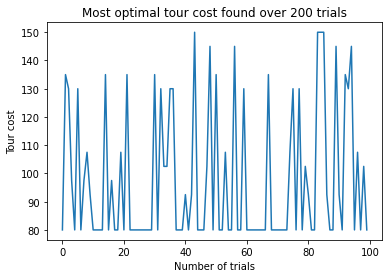

In [29]:
trials = np.arange(100) #number of trials
outputs = []

#running the simmulated annealing proccess with the ergodic chain for 100 trials.
for _ in trials:
    path, quality, states, states_trials = SA_weather(f=f, peturb=peturb_TSP, sol=sol_0, per_temp=per_temp, 
                   t0=t0, alpha=alpha, transition_matrix=ergodic_matrix, state= 1, multipliers=weather_mult, tol=tol, minimisation=True, verbose=False)
    outputs.append(quality)

plt.plot(trials, outputs)
plt.title("Most optimal tour cost found over 200 trials")
plt.xlabel("Number of trials")
plt.ylabel("Tour cost")
print(outputs)
print(outputs.count(80.0))
print(outputs.count(100.0))
print(outputs.count(120.0))
print(len(outputs))


[[0.60126848 0.19936576 0.19936576]
 [0.59809727 0.20095136 0.20095136]
 [0.59809727 0.20095136 0.20095136]]


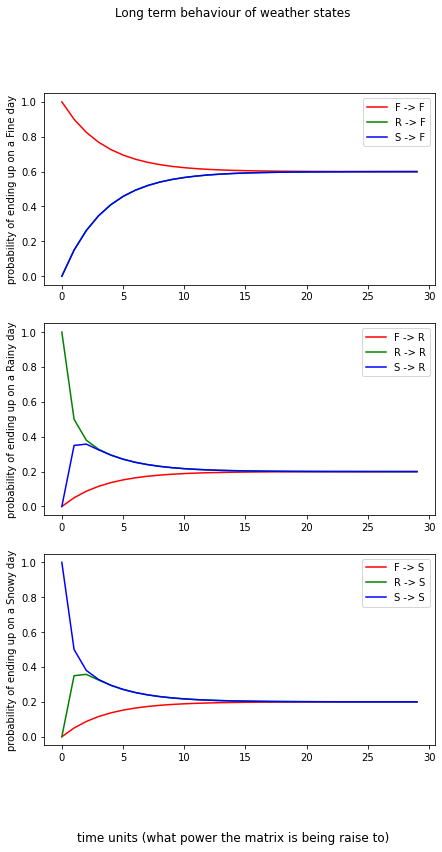

In [30]:
#find the stationary distribution by doing the ergodic matrix to a high power (like 30, anything after this is a 0.000001 difference)
powers = np.arange(30)

#now we can comapre each by plotting them
figure, axis = plt.subplots(3)
figure.set_figwidth(7)
figure.set_figheight(12)
figure.suptitle("Long term behaviour of weather states")
figure.supxlabel("time units (what power the matrix is being raise to)")


axis[0].plot(powers, [np.linalg.matrix_power(ergodic_matrix, i)[0][0] for i in powers], color = 'r', label = "F -> F")
axis[0].plot(powers, [np.linalg.matrix_power(ergodic_matrix, i)[1][0] for i in powers], color = 'g', label = "R -> F")
axis[0].plot(powers, [np.linalg.matrix_power(ergodic_matrix, i)[2][0] for i in powers], color = 'b', label = "S -> F")
axis[0].legend()
axis[0].set_ylabel("probability of ending up on a Fine day")


axis[1].plot(powers, [np.linalg.matrix_power(ergodic_matrix, i)[0][1] for i in powers], color = 'r', label = "F -> R")
axis[1].plot(powers, [np.linalg.matrix_power(ergodic_matrix, i)[1][1] for i in powers], color = 'g', label = "R -> R")
axis[1].plot(powers, [np.linalg.matrix_power(ergodic_matrix, i)[2][1] for i in powers], color = 'b', label = "S -> R")
axis[1].legend()
axis[1].set_ylabel("probability of ending up on a Rainy day")

axis[2].plot(powers, [np.linalg.matrix_power(ergodic_matrix, i)[0][2] for i in powers], color = 'r', label = "F -> S")
axis[2].plot(powers, [np.linalg.matrix_power(ergodic_matrix, i)[1][2] for i in powers], color = 'g', label = "R -> S")
axis[2].plot(powers, [np.linalg.matrix_power(ergodic_matrix, i)[2][2] for i in powers], color = 'b', label = "S -> S")
axis[2].legend()
axis[2].set_ylabel("probability of ending up on a Snowy day")

print(np.linalg.matrix_power(ergodic_matrix, 20))


In [31]:
#find the eigen vector with eigen value 1 of the ergodic matrix
lambda_, v = np.linalg.eig(ergodic_matrix.T)
print(v[:,0]/sum(v[:,0]))

[0.6 0.2 0.2]
